In [184]:
import numpy as np
import pickle as pkl
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from itertools import product
from datetime import datetime
import pickle as pkl
import matplotlib.pyplot as plt
import os
import pandas as pd


In [185]:
with open("gs_nr_300_600_2020230722-103548.pkl", "rb") as f:
    res_log = pkl.load(f)

res_log

[{'parameters': {'n': 300,
   'p': 600,
   'm': 20,
   'noise_level_lst': [0.12],
   'model_name': 'BOMP',
   'cv_num': 5,
   'trial_num': 15,
   'param_grid': {'K': array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
            27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
            53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
            79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
           105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
           131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155,
           157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179])},
   'fixed_params': {'N_bag': 500,
    'signal_bag_percent': 0.8,
    'atom_bag_percent': 0.9,
    'select_atom_percent': 0,
    'replace_flag': False,
    'agg_func': 'weight',
    'ignore_warning': True,
    'random_seed': 1}},
  'noise_level_lowest_cv_MSE': [0.02007878540236682],
  'trials_testing_score':

In [186]:
res_log = res_log[0]

In [187]:
params = res_log["parameters"]
log = res_log["log"]
K_lst = params["param_grid"]['K']

In [188]:
params

{'n': 300,
 'p': 600,
 'm': 20,
 'noise_level_lst': [0.12],
 'model_name': 'BOMP',
 'cv_num': 5,
 'trial_num': 15,
 'param_grid': {'K': array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
          27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
          53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
          79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
         105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
         131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155,
         157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179])},
 'fixed_params': {'N_bag': 500,
  'signal_bag_percent': 0.8,
  'atom_bag_percent': 0.9,
  'select_atom_percent': 0,
  'replace_flag': False,
  'agg_func': 'weight',
  'ignore_warning': True,
  'random_seed': 1}}

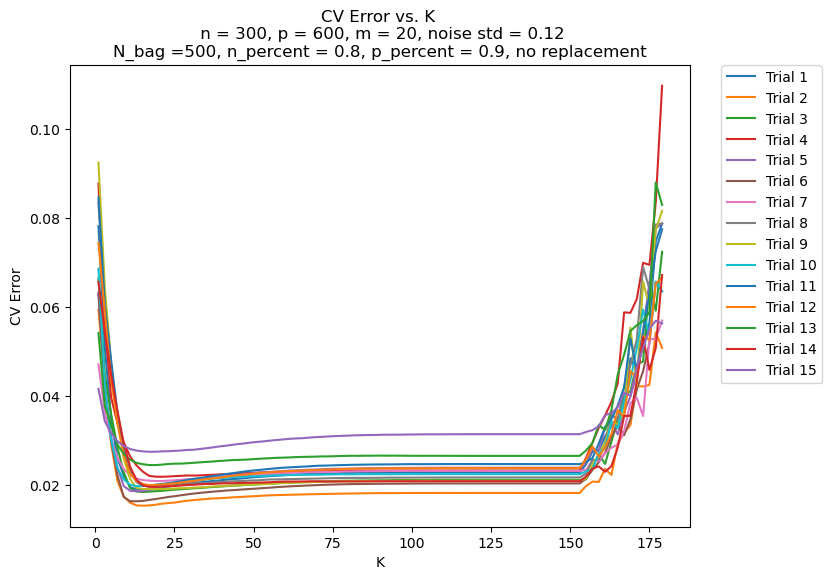

In [211]:
cv_results_lst = []

log = res_log["log"]
K_lst = res_log["parameters"]["param_grid"]['K']

for i in range(len(log)):
    cv_results_lst.append(log[i]["cv_error_lst"])
    
plt.subplots(figsize=(8, 6))
for i in range(len(cv_results_lst)):
    plt.plot(K_lst, cv_results_lst[i], label="Trial {}".format(i+1))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("CV Error vs. K \n n = 300, p = 600, m = 20, noise std = 0.12\nN_bag =500, n_percent = 0.8, p_percent = 0.9, no replacement")
plt.xlabel("K")
plt.ylabel("CV Error")
plt.show()


In [190]:
# avg best K

avg_best_K = np.mean([log[i]["best_params"]["K"] for i in range(len(log))])
print("Avg best K: ", avg_best_K)

Avg best K:  16.733333333333334


In [191]:
with open("gs_nr_300_600_20_05_07_plot20230723-172350.pkl", "rb") as f:
    res_log_0507 = pkl.load(f)

res_log_0507 = res_log_0507[0]

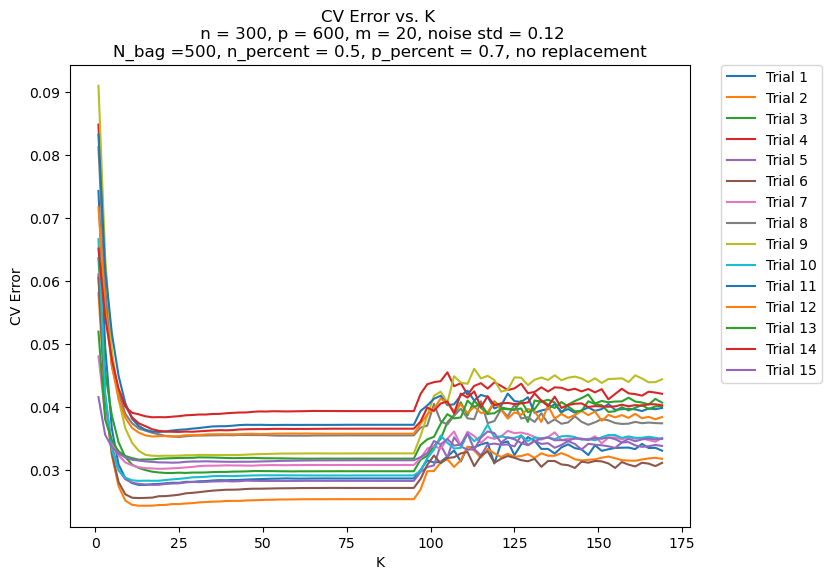

In [210]:
cv_results_lst = []
log = res_log_0507["log"]
K_lst = res_log_0507["parameters"]["param_grid"]['K']

for i in range(len(log)):
    cv_results_lst.append(log[i]["cv_error_lst"])
    
plt.subplots(figsize=(8, 6))
for i in range(len(cv_results_lst)):
    plt.plot(K_lst, cv_results_lst[i], label="Trial {}".format(i+1))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("K")
plt.ylabel("CV Error")
plt.title("CV Error vs. K \n n = 300, p = 600, m = 20, noise std = 0.12\nN_bag =500, n_percent = 0.5, p_percent = 0.7, no replacement")
plt.show()


------------------------

In [193]:
# omp baseline

with open("omp_baseline_testing_300_600_20.pkl", "rb") as f:
    omp_baseline = pkl.load(f)
    
omp_baseline

{'parameters': {'N': 600,
  'd': 300,
  'm': 20,
  'noise_level_lst': [0.0,
   0.02,
   0.04,
   0.06,
   0.08,
   0.1,
   0.12,
   0.14,
   0.16,
   0.18,
   0.2,
   0.22,
   0.24,
   0.26,
   0.28,
   0.3,
   0.32,
   0.34,
   0.36,
   0.38,
   0.4,
   0.42,
   0.44,
   0.46,
   0.48,
   0.5],
  'cv_num': 5,
  'trial_num': 20,
  'K_lst': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40]},
 'noise_level_best_K': [20.4,
  22.2,
  20.0,
  18.75,
  15.05,
  16.25,
  12.35,
  14.95,
  12.45,
  12.5,
  11.45,
  10.95,
  8.65,
  8.9,
  7.7,
  8.2,
  9.4,
  8.15,
  7.3,
  6.2,
  6.85,
  6.5,
  5.75,
  7.1,
  5.55,
  7.9],
 'noise_level_lowest_MSE': [5.338207820629569e-31,
  0.0005482711680321829,
  0.002207182989454363,
  0.004849452788306836,
  0.008358753795161444,
  0.01293

In [194]:
omp_baeline_noise_levels = omp_baseline['parameters']['noise_level_lst']
omp_baseline.keys()

dict_keys(['parameters', 'noise_level_best_K', 'noise_level_lowest_MSE', 'noise_level_testing_score', 'noise_level_training_score', 'log'])

In [195]:
# bomp results

with open("gs_nr_300_600_20_08_09_AN20230723-200952.pkl", "rb") as f:
    bomp_results_0809 = pkl.load(f)
    
with open("gs_nr_300_600_20_09_09_AN20230723-201105.pkl", "rb") as f:
    bomp_results_0909 = pkl.load(f)
    
with open("gs_nr_300_600_20_09_10_AN20230723-201105.pkl", "rb") as f:
    bomp_results_0910 = pkl.load(f)
    
with open("gs_nr_300_600_20_06_07_AN20230723-200753.pkl", "rb") as f:
    bomp_results_0607 = pkl.load(f)
    
with open("gs_nr_300_600_20_05_07_AN20230723-200753.pkl", "rb") as f:
    bomp_results_0507 = pkl.load(f)

with open("gs_nr_300_600_20_06_09_AN20230723-200952.pkl", "rb") as f:
    bomp_results_0609 = pkl.load(f)
    
bomp_results_0809 = bomp_results_0809[0]
bomp_results_0909 = bomp_results_0909[0]
bomp_results_0910 = bomp_results_0910[0]
bomp_results_0607 = bomp_results_0607[0]
bomp_results_0507 = bomp_results_0507[0]
bomp_results_0609 = bomp_results_0609[0]

In [196]:
bomp_noise_lst = bomp_results_0809["parameters"]["noise_level_lst"]

In [197]:
bomp_results_0809.keys()

dict_keys(['parameters', 'noise_level_lowest_cv_MSE', 'trials_testing_score', 'trials_training_score', 'log'])

In [198]:
# put them all into a dataframe

df_omp_results = pd.DataFrame({"noise_level": omp_baeline_noise_levels, 
                            'Lowest CV Error': omp_baseline['noise_level_lowest_MSE'],
                            'Training Error': omp_baseline['noise_level_training_score'],
                            'Test Error': omp_baseline['noise_level_testing_score']})
df_omp_results

,noise_level,Lowest CV Error,Training Error,Test Error
0,0.00,5.338208e-31,1.964944e-32,2.348823e-32
1,0.02,5.482712e-04,3.606460e-04,5.384274e-04
2,0.04,2.207183e-03,1.580940e-03,2.244721e-03
3,0.06,4.849453e-03,3.670742e-03,5.066761e-03
4,0.08,8.358754e-03,7.150718e-03,9.266858e-03
5,0.10,1.293109e-02,1.002195e-02,1.436820e-02
6,0.12,1.826216e-02,1.644583e-02,1.935930e-02
7,0.14,2.502325e-02,2.001362e-02,2.789344e-02
8,0.16,3.275207e-02,2.687825e-02,3.666677e-02
9,0.18,4.093487e-02,3.318076e-02,4.726761e-02


In [199]:
df_bomp_results_0809 = pd.DataFrame({"noise_level": bomp_noise_lst, 
                            'Lowest CV Error': bomp_results_0809['noise_level_lowest_cv_MSE'],
                            'Training Error': bomp_results_0809['trials_training_score'],
                            'Test Error': bomp_results_0809['trials_testing_score']})
df_bomp_results_0809

,noise_level,Lowest CV Error,Training Error,Test Error
0,0.00,7.706328e-33,7.159318e-33,7.984320e-33
1,0.02,5.193414e-04,3.562343e-04,4.859866e-04
2,0.04,2.105534e-03,1.351385e-03,1.951041e-03
3,0.06,4.823928e-03,2.950479e-03,4.390553e-03
4,0.08,8.764213e-03,5.086111e-03,7.905049e-03
5,0.10,1.383408e-02,8.255281e-03,1.245980e-02
6,0.12,2.005181e-02,1.142969e-02,1.792766e-02
7,0.14,2.738944e-02,1.549076e-02,2.438080e-02
8,0.16,3.584196e-02,2.099298e-02,3.186007e-02
9,0.18,4.533101e-02,2.714891e-02,4.084237e-02


In [200]:
df_bomp_results_0909 = pd.DataFrame({"noise_level": bomp_noise_lst, 
                            'Lowest CV Error': bomp_results_0909['noise_level_lowest_cv_MSE'],
                            'Training Error': bomp_results_0909['trials_training_score'],
                            'Test Error': bomp_results_0909['trials_testing_score']})
df_bomp_results_0909

,noise_level,Lowest CV Error,Training Error,Test Error
0,0.00,7.493763e-33,8.435342e-33,1.014448e-32
1,0.02,5.162881e-04,3.601124e-04,4.868632e-04
2,0.04,2.080666e-03,1.394062e-03,1.941246e-03
3,0.06,4.735416e-03,3.100158e-03,4.368165e-03
4,0.08,8.593226e-03,5.462023e-03,7.844671e-03
5,0.10,1.353304e-02,8.674873e-03,1.236864e-02
6,0.12,1.970878e-02,1.246035e-02,1.778530e-02
7,0.14,2.704075e-02,1.738163e-02,2.394721e-02
8,0.16,3.545893e-02,2.319238e-02,3.176838e-02
9,0.18,4.495136e-02,3.002804e-02,4.061227e-02


In [201]:
df_bomp_results_0910 = pd.DataFrame({"noise_level": bomp_noise_lst, 
                            'Lowest CV Error': bomp_results_0910['noise_level_lowest_cv_MSE'],
                            'Training Error': bomp_results_0910['trials_training_score'],
                            'Test Error': bomp_results_0910['trials_testing_score']})
df_bomp_results_0910

,noise_level,Lowest CV Error,Training Error,Test Error
0,0.00,2.228305e-32,3.762892e-32,4.126092e-32
1,0.02,4.758990e-04,3.697033e-04,4.527542e-04
2,0.04,1.936547e-03,1.484973e-03,1.811734e-03
3,0.06,4.456396e-03,3.361939e-03,4.138377e-03
4,0.08,8.270529e-03,5.869155e-03,7.578652e-03
5,0.10,1.316230e-02,9.463428e-03,1.211302e-02
6,0.12,1.943160e-02,1.352940e-02,1.749430e-02
7,0.14,2.694162e-02,1.889432e-02,2.360791e-02
8,0.16,3.554828e-02,2.549039e-02,3.183082e-02
9,0.18,4.526154e-02,3.322162e-02,4.128273e-02


In [202]:
def res_log_to_df(res_log):
    return pd.DataFrame({"noise_level": res_log["parameters"]["noise_level_lst"], 
                        'Lowest CV Error': res_log['noise_level_lowest_cv_MSE'],
                        'Training Error': res_log['trials_training_score'],
                        'Test Error': res_log['trials_testing_score']})
    
df_bomp_results_0609 = res_log_to_df(bomp_results_0609)
df_bomp_results_0609

,noise_level,Lowest CV Error,Training Error,Test Error
0,0.00,6.994806e-33,6.895273e-33,7.592693e-33
1,0.02,5.390689e-04,3.442993e-04,4.952524e-04
2,0.04,2.255343e-03,1.281669e-03,1.992206e-03
3,0.06,5.329443e-03,2.634252e-03,4.556939e-03
4,0.08,9.706389e-03,4.344934e-03,8.281509e-03
5,0.10,1.527528e-02,6.990385e-03,1.306673e-02
6,0.12,2.190439e-02,9.837967e-03,1.876761e-02
7,0.14,2.964113e-02,1.316080e-02,2.554704e-02
8,0.16,3.830717e-02,1.754558e-02,3.346956e-02
9,0.18,4.791734e-02,2.282388e-02,4.267165e-02


In [203]:
df_bomp_results_0607 = res_log_to_df(bomp_results_0607)
df_bomp_results_0607

,noise_level,Lowest CV Error,Training Error,Test Error
0,0.00,0.001950,0.000988,0.001773
1,0.02,0.003854,0.001741,0.003073
2,0.04,0.006511,0.002857,0.005228
3,0.06,0.010111,0.004515,0.008370
4,0.08,0.014685,0.006477,0.012390
5,0.10,0.020232,0.008761,0.017262
6,0.12,0.026749,0.011954,0.023053
7,0.14,0.034229,0.015493,0.029881
8,0.16,0.042601,0.020137,0.037675
9,0.18,0.051794,0.025661,0.046613


In [204]:
df_bomp_results_0507 = res_log_to_df(bomp_results_0507)
df_bomp_results_0507

,noise_level,Lowest CV Error,Training Error,Test Error
0,0.00,0.002395,0.001134,0.002018
1,0.02,0.004708,0.001927,0.003404
2,0.04,0.007832,0.003187,0.005793
3,0.06,0.011883,0.004891,0.009125
4,0.08,0.016893,0.006770,0.013451
5,0.10,0.022813,0.009440,0.018561
6,0.12,0.029556,0.012646,0.024677
7,0.14,0.037188,0.015353,0.031892
8,0.16,0.045545,0.019721,0.039783
9,0.18,0.054728,0.025165,0.049018


## Put it together

In [205]:
df_merged = pd.merge(df_omp_results, df_bomp_results_0809, on="noise_level", suffixes=("", "_bomp_0809"), how='inner')
df_merged

,noise_level,Lowest CV Error,Training Error,Test Error,Lowest CV Error_bomp_0809,Training Error_bomp_0809,Test Error_bomp_0809
0,0.00,5.338208e-31,1.964944e-32,2.348823e-32,7.706328e-33,7.159318e-33,7.984320e-33
1,0.02,5.482712e-04,3.606460e-04,5.384274e-04,5.193414e-04,3.562343e-04,4.859866e-04
2,0.04,2.207183e-03,1.580940e-03,2.244721e-03,2.105534e-03,1.351385e-03,1.951041e-03
3,0.06,4.849453e-03,3.670742e-03,5.066761e-03,4.823928e-03,2.950479e-03,4.390553e-03
4,0.08,8.358754e-03,7.150718e-03,9.266858e-03,8.764213e-03,5.086111e-03,7.905049e-03
5,0.10,1.293109e-02,1.002195e-02,1.436820e-02,1.383408e-02,8.255281e-03,1.245980e-02
6,0.12,1.826216e-02,1.644583e-02,1.935930e-02,2.005181e-02,1.142969e-02,1.792766e-02
7,0.14,2.502325e-02,2.001362e-02,2.789344e-02,2.738944e-02,1.549076e-02,2.438080e-02
8,0.16,3.275207e-02,2.687825e-02,3.666677e-02,3.584196e-02,2.099298e-02,3.186007e-02
9,0.18,4.093487e-02,3.318076e-02,4.726761e-02,4.533101e-02,2.714891e-02,4.084237e-02


In [206]:
df_full = pd.merge(df_merged, df_bomp_results_0909, on="noise_level", suffixes=("", "_bomp_0909"), how='left')
df_full = pd.merge(df_full, df_bomp_results_0910, on="noise_level", suffixes=("", "_bomp_0910"), how='left')
df_full = pd.merge(df_full, df_bomp_results_0609, on="noise_level", suffixes=("", "_bomp_0609"), how='left')
df_full = pd.merge(df_full, df_bomp_results_0607, on="noise_level", suffixes=("", "_bomp_0607"), how='left')
df_full = pd.merge(df_full, df_bomp_results_0507, on="noise_level", suffixes=("", "_bomp_0507"), how='left')

df_full.rename(columns={"Lowest CV Error": "Lowest CV Error_omp",
                        "Training Error" : "Training Error_omp",
                        "Test Error" : "Test Error_omp"}, inplace=True)

df_full

,noise_level,Lowest CV Error_omp,Training Error_omp,Test Error_omp,Lowest CV Error_bomp_0809,Training Error_bomp_0809,Test Error_bomp_0809,Lowest CV Error_bomp_0909,Training Error_bomp_0909,Test Error_bomp_0909,...,Test Error_bomp_0910,Lowest CV Error_bomp_0609,Training Error_bomp_0609,Test Error_bomp_0609,Lowest CV Error_bomp_0607,Training Error_bomp_0607,Test Error_bomp_0607,Lowest CV Error_bomp_0507,Training Error_bomp_0507,Test Error_bomp_0507
0,0.00,5.338208e-31,1.964944e-32,2.348823e-32,7.706328e-33,7.159318e-33,7.984320e-33,7.493763e-33,8.435342e-33,1.014448e-32,...,4.126092e-32,6.994806e-33,6.895273e-33,7.592693e-33,0.001950,0.000988,0.001773,0.002395,0.001134,0.002018
1,0.02,5.482712e-04,3.606460e-04,5.384274e-04,5.193414e-04,3.562343e-04,4.859866e-04,5.162881e-04,3.601124e-04,4.868632e-04,...,4.527542e-04,5.390689e-04,3.442993e-04,4.952524e-04,0.003854,0.001741,0.003073,0.004708,0.001927,0.003404
2,0.04,2.207183e-03,1.580940e-03,2.244721e-03,2.105534e-03,1.351385e-03,1.951041e-03,2.080666e-03,1.394062e-03,1.941246e-03,...,1.811734e-03,2.255343e-03,1.281669e-03,1.992206e-03,0.006511,0.002857,0.005228,0.007832,0.003187,0.005793
3,0.06,4.849453e-03,3.670742e-03,5.066761e-03,4.823928e-03,2.950479e-03,4.390553e-03,4.735416e-03,3.100158e-03,4.368165e-03,...,4.138377e-03,5.329443e-03,2.634252e-03,4.556939e-03,0.010111,0.004515,0.008370,0.011883,0.004891,0.009125
4,0.08,8.358754e-03,7.150718e-03,9.266858e-03,8.764213e-03,5.086111e-03,7.905049e-03,8.593226e-03,5.462023e-03,7.844671e-03,...,7.578652e-03,9.706389e-03,4.344934e-03,8.281509e-03,0.014685,0.006477,0.012390,0.016893,0.006770,0.013451
5,0.10,1.293109e-02,1.002195e-02,1.436820e-02,1.383408e-02,8.255281e-03,1.245980e-02,1.353304e-02,8.674873e-03,1.236864e-02,...,1.211302e-02,1.527528e-02,6.990385e-03,1.306673e-02,0.020232,0.008761,0.017262,0.022813,0.009440,0.018561
6,0.12,1.826216e-02,1.644583e-02,1.935930e-02,2.005181e-02,1.142969e-02,1.792766e-02,1.970878e-02,1.246035e-02,1.778530e-02,...,1.749430e-02,2.190439e-02,9.837967e-03,1.876761e-02,0.026749,0.011954,0.023053,0.029556,0.012646,0.024677
7,0.14,2.502325e-02,2.001362e-02,2.789344e-02,2.738944e-02,1.549076e-02,2.438080e-02,2.704075e-02,1.738163e-02,2.394721e-02,...,2.360791e-02,2.964113e-02,1.316080e-02,2.554704e-02,0.034229,0.015493,0.029881,0.037188,0.015353,0.031892
8,0.16,3.275207e-02,2.687825e-02,3.666677e-02,3.584196e-02,2.099298e-02,3.186007e-02,3.545893e-02,2.319238e-02,3.176838e-02,...,3.183082e-02,3.830717e-02,1.754558e-02,3.346956e-02,0.042601,0.020137,0.037675,0.045545,0.019721,0.039783
9,0.18,4.093487e-02,3.318076e-02,4.726761e-02,4.533101e-02,2.714891e-02,4.084237e-02,4.495136e-02,3.002804e-02,4.061227e-02,...,4.128273e-02,4.791734e-02,2.282388e-02,4.267165e-02,0.051794,0.025661,0.046613,0.054728,0.025165,0.049018


In [207]:
df_full_testing = df_full[['noise_level', 'Test Error_omp', 'Test Error_bomp_0809', 'Test Error_bomp_0909', 'Test Error_bomp_0910', 'Test Error_bomp_0609', 'Test Error_bomp_0607', 'Test Error_bomp_0507']]
df_full_testing

,noise_level,Test Error_omp,Test Error_bomp_0809,Test Error_bomp_0909,Test Error_bomp_0910,Test Error_bomp_0609,Test Error_bomp_0607,Test Error_bomp_0507
0,0.00,2.348823e-32,7.984320e-33,1.014448e-32,4.126092e-32,7.592693e-33,0.001773,0.002018
1,0.02,5.384274e-04,4.859866e-04,4.868632e-04,4.527542e-04,4.952524e-04,0.003073,0.003404
2,0.04,2.244721e-03,1.951041e-03,1.941246e-03,1.811734e-03,1.992206e-03,0.005228,0.005793
3,0.06,5.066761e-03,4.390553e-03,4.368165e-03,4.138377e-03,4.556939e-03,0.008370,0.009125
4,0.08,9.266858e-03,7.905049e-03,7.844671e-03,7.578652e-03,8.281509e-03,0.012390,0.013451
5,0.10,1.436820e-02,1.245980e-02,1.236864e-02,1.211302e-02,1.306673e-02,0.017262,0.018561
6,0.12,1.935930e-02,1.792766e-02,1.778530e-02,1.749430e-02,1.876761e-02,0.023053,0.024677
7,0.14,2.789344e-02,2.438080e-02,2.394721e-02,2.360791e-02,2.554704e-02,0.029881,0.031892
8,0.16,3.666677e-02,3.186007e-02,3.176838e-02,3.183082e-02,3.346956e-02,0.037675,0.039783
9,0.18,4.726761e-02,4.084237e-02,4.061227e-02,4.128273e-02,4.267165e-02,0.046613,0.049018


In [208]:
df_full_testing_round = df_full_testing.round(5)
df_full_testing_round.style.highlight_min(color = 'green', axis = 1)

,noise_level,Test Error_omp,Test Error_bomp_0809,Test Error_bomp_0909,Test Error_bomp_0910,Test Error_bomp_0609,Test Error_bomp_0607,Test Error_bomp_0507
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001770,0.002020
1,0.020000,0.000540,0.000490,0.000490,0.000450,0.000500,0.003070,0.003400
2,0.040000,0.002240,0.001950,0.001940,0.001810,0.001990,0.005230,0.005790
3,0.060000,0.005070,0.004390,0.004370,0.004140,0.004560,0.008370,0.009130
4,0.080000,0.009270,0.007910,0.007840,0.007580,0.008280,0.012390,0.013450
5,0.100000,0.014370,0.012460,0.012370,0.012110,0.013070,0.017260,0.018560
6,0.120000,0.019360,0.017930,0.017790,0.017490,0.018770,0.023050,0.024680
7,0.140000,0.027890,0.024380,0.023950,0.023610,0.025550,0.029880,0.031890
8,0.160000,0.036670,0.031860,0.031770,0.031830,0.033470,0.037680,0.039780
9,0.180000,0.047270,0.040840,0.040610,0.041280,0.042670,0.046610,0.049020


In [209]:
bomp_results_0809['parameters']['fixed_params']

{'N_bag': 500,
 'signal_bag_percent': 0.8,
 'atom_bag_percent': 0.9,
 'select_atom_percent': 0,
 'replace_flag': False,
 'agg_func': 'weight',
 'ignore_warning': True,
 'random_seed': 1}

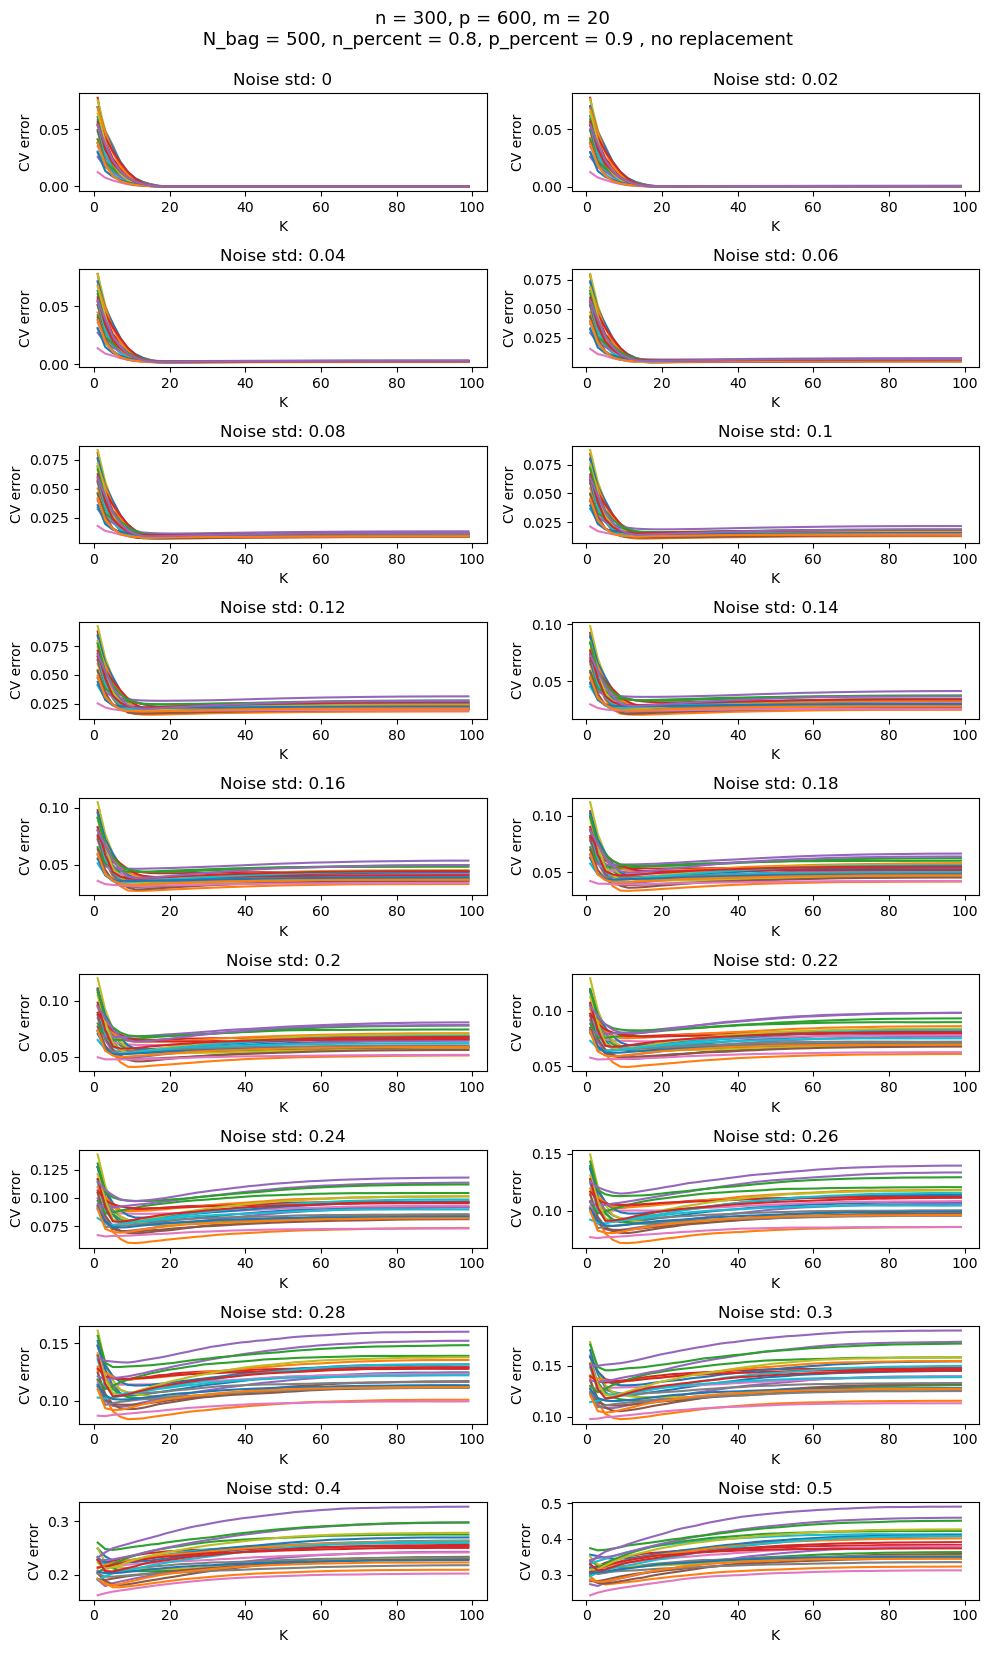

In [219]:
def plot_K_error_all_noise(res_log, col_num = 2, figsize = (10, 12)):
    noise_level_lst = res_log["parameters"]["noise_level_lst"]
    trial_num = res_log["parameters"]["trial_num"]
    K_lst = res_log["parameters"]["param_grid"]["K"]
    fig, ax = plt.subplots(len(noise_level_lst) // col_num, col_num, figsize = figsize)
    for i, noise_level in enumerate(noise_level_lst):
        row = int(i // col_num)
        column = i % col_num
        for j in range(trial_num):
            ax[row, column].plot(K_lst, res_log['log'][i * trial_num + j]['cv_error_lst'])
        ax[row, column].set_xlabel("K")
        ax[row, column].set_ylabel("CV error")
        ax[row, column].set_title("Noise std: " + str(noise_level))  
    plt.tight_layout()
    fixed_params = res_log['parameters']['fixed_params']
    fig.suptitle(f"n = {res_log['parameters']['n']}, p = {res_log['parameters']['p']}, m = {res_log['parameters']['m']} \n N_bag = {fixed_params['N_bag']}, n_percent = {fixed_params['signal_bag_percent']}, p_percent = {fixed_params['atom_bag_percent']} , no replacement", fontsize=13, y = 1.03)
    
plot_K_error_all_noise(bomp_results_0809, col_num = 2, figsize = (10, 16))

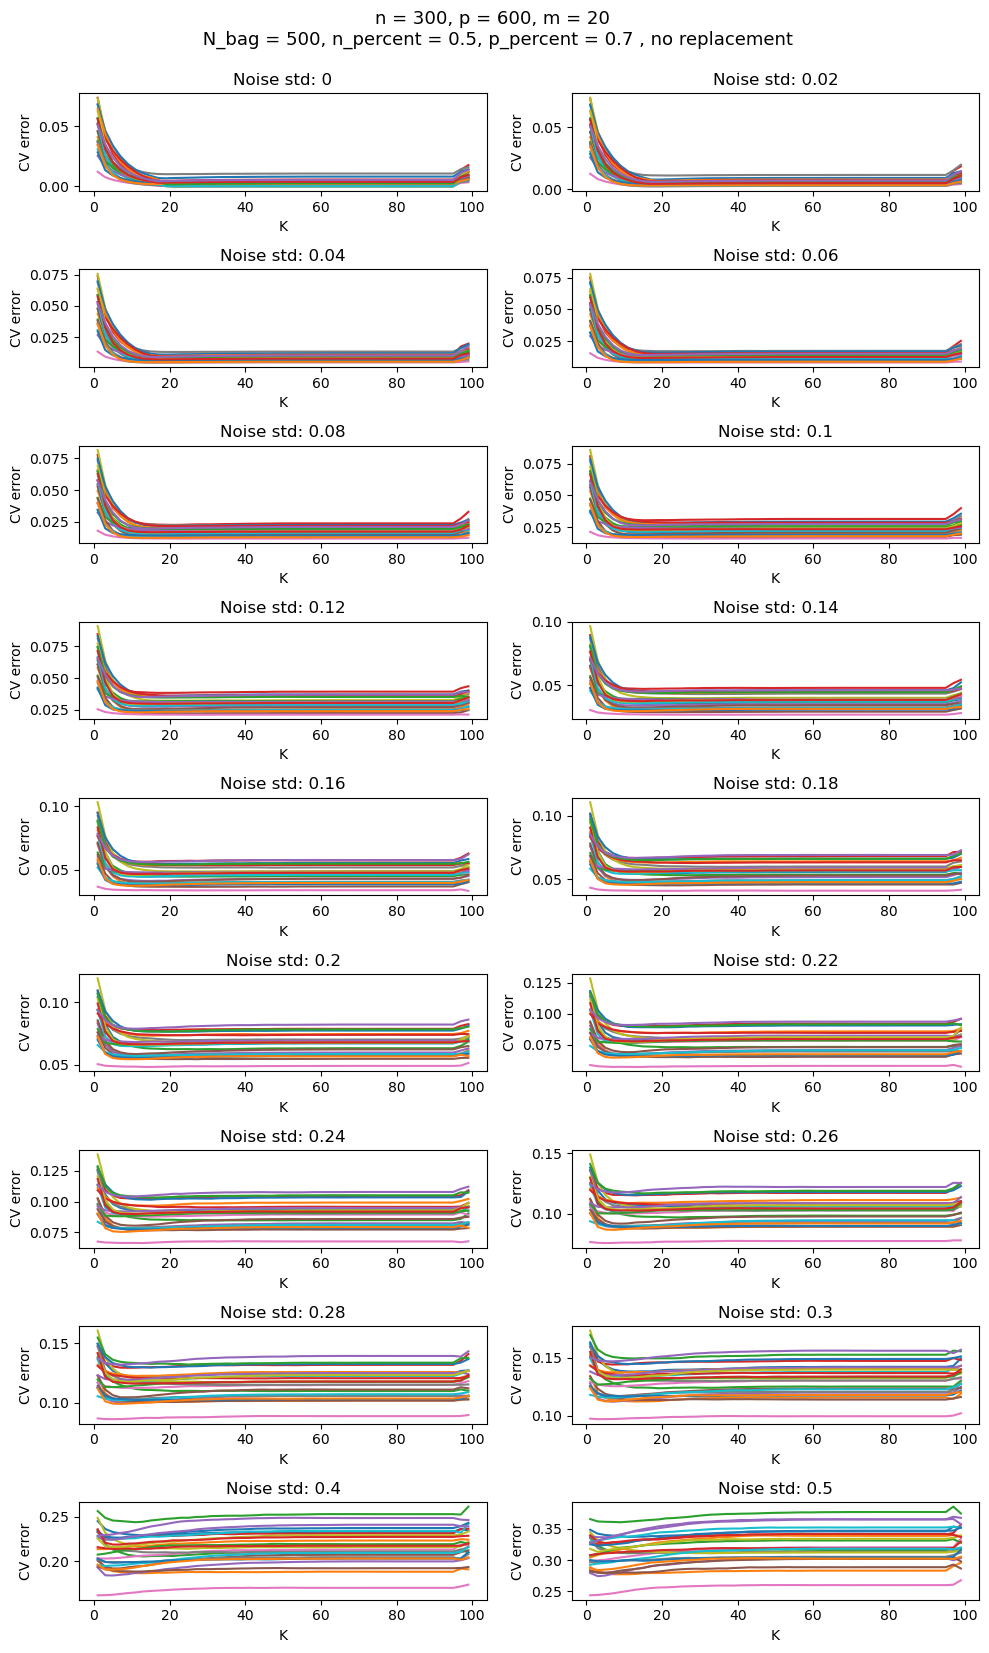

In [220]:
plot_K_error_all_noise(bomp_results_0507, col_num = 2, figsize = (10, 16))